# IS 597: Final Project
# Project: Analysis of Hate Crimes during COVID-19 Pandemic
Python version: 3.9 
Author:
(1) Ritesh Rajput | riteshr2@illinois.edu
(2) Nishit Singh | ns1601@illinois.edu

## Libraries used 
- We have imported pandas library for using the dataframe,numpy library to compute certain calculations,and for rendering different graphs and vizualizations we used visualize,matplotlib and seaborn libraries.


### Libraries

In [1]:
import os
import pandas as pd
import warnings
import numpy as np
import visualize as vis
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)

### Function: get_data() is used to read all the requested dataset from the data folder, clean the data and return a dataframe

The 3 data files used here are as follows:

- Population   :   Contains race wise population count of anti-asian hate crime offenders for last 10 years.
- Hatecrime    :   Contains the asian victim count in the United States from last 10 years to 21st November, 2020.
- Unemployemnt :   Contains state-wise unemployemnt data for the last 10 years 

In [2]:
def get_data(file_name, all_df=[]):
    """
    Function to read the data files, create a concatenated dataframe
    :param file_name: Name of the the folder to read
    :param all_df: Initializing list to collect all dataframe created
    :return: Concatenated dataframe
    """
    files = os.listdir('./data/' + file_name + '')  # Files available in the directory
    print(file_name+': '+str(files),'\n')
    for file in range(len(files)):
        if file_name == 'population':  # Reading all files from folder named "population"
            # Splitting year from filename to include as a column in dataframe
            year = int(files[file].split('_')[1].split('.')[0])
            df = files[file]
            df = pd.read_csv('data/' + file_name + '/' + files[file] + '', skiprows=2)
            df['Year'] = year
            indexNames = df[df['Location'] == 'Notes'].index[0]
            df = df.iloc[:indexNames - 1, :]  # Removing extra rows
            df.drop(df.index[df['Location'] == 'United States'], inplace=True)  # Dropping the total row
            # df['Black'] = df['Black'].fillna(0)
            df = df.fillna(0)
            df.drop(df.index[df['Black'] == '<.01'], inplace=True)
            df['Black'] = df['Black'].astype('float')
            all_df.append(df)

        elif file_name == 'unemployment':
            # Splitting year from filename to include as a column in dataframe
            state = files[file].split('.')[0]
            df = files[file]
            df = pd.read_excel('data/' + file_name + '/' + files[file] + '', skiprows=10)
            df['state'] = state
            indexNames = df[df['Year'] == 2021.0].index[0]
            # Dropping the rows containing data of year 2021 since we are considering previous 10 years data (2011-2020)
            df = df.iloc[:indexNames - 1, :]
            # Filtering the required columns
            df = df[['Year', 'unemployment', 'state']]
            all_df.append(df)

        elif file_name == 'hatecrime':
            df = files[file]
            df = pd.read_csv('data/' + file_name + '/' + files[file] + '')
            startIndex = df[df['DATA_YEAR'] == 2011].index[0]
            df = df.iloc[startIndex:, :]  # Removing rows with year earlier than 2011
            hatecrime_drop_columns = ['INCIDENT_ID', 'ORI', 'PUB_AGENCY_NAME', 'PUB_AGENCY_UNIT', 'DIVISION_NAME',
                                      'POPULATION_GROUP_CODE', 'POPULATION_GROUP_DESC', 'INCIDENT_DATE',
                                      'ADULT_VICTIM_COUNT',
                                      'JUVENILE_VICTIM_COUNT', 'JUVENILE_OFFENDER_COUNT', 'TOTAL_OFFENDER_COUNT',
                                      'ADULT_OFFENDER_COUNT', 'JUVENILE_OFFENDER_COUNT', 'OFFENSE_NAME',
                                      'TOTAL_INDIVIDUAL_VICTIMS',
                                      'LOCATION_NAME', 'VICTIM_TYPES', 'MULTIPLE_OFFENSE', 'MULTIPLE_BIAS']

            df = df.drop(hatecrime_drop_columns, axis=1)  # Dropping columns which are not required
            all_df.append(df)
            # hatecrime_filter_df = df[['DATA_YEAR', 'STATE_NAME', 'REGION_NAME', 'OFFENDER_RACE', 'VICTIM_COUNT']]
        else:
            pass
    dfs = pd.concat(all_df)
    all_df.clear()
    return dfs

In [3]:
if __name__ == '__main__':
    # Reading data from the folder
    hatecrime_df = get_data('hatecrime')
    unemployment_df = get_data('unemployment')
    population_df = get_data('population')

hatecrime: ['hate_crime.csv'] 

unemployment: ['North_Carolina.xlsx', 'Ohio.xlsx', 'Pureto_Rico.xlsx', 'Illinois.xlsx', 'Louisiana.xlsx', 'Oregon.xlsx', 'New_York.xlsx', 'West_Virgina.xlsx', 'Mississippi.xlsx', 'Tennessee.xlsx', 'Nevada.xlsx', 'South_Carolina.xlsx', 'North_Dakota.xlsx', 'Montana.xlsx', 'Minnesota.xlsx', 'South_Dakota.xlsx', 'Oklahoma.xlsx', 'Vermont.xlsx', 'New_Mexico.xlsx', 'Florida.xlsx', 'Utah.xlsx', 'Kentucky.xlsx', 'Michigan.xlsx', 'Indiana.xlsx', 'Delaware.xlsx', 'Rhode_Island.xlsx', 'Connecticut.xlsx', 'Washington.xlsx', 'California.xlsx', 'Maryland.xlsx', 'Pennsylvania.xlsx', 'hawaii.xlsx', 'New_Jersey.xlsx', 'Virginia.xlsx', 'Colorado.xlsx', 'Wynoming.xlsx', 'Alabama.xlsx', 'Maine.xlsx', 'Iowa.xlsx', 'Missouri.xlsx', 'Arkansas.xlsx', 'Alaska.xlsx', 'New_Hampshire.xlsx', 'District_Of_Columbia.xlsx', 'Kansas.xlsx', 'Nebraska.xlsx', 'Massachusetts.xlsx', 'Texas.xlsx', 'Idaho.xlsx', 'Georgia.xlsx', 'Wisconsin.xlsx', 'Arizona.xlsx'] 

population: ['population_2020.

## Hypothesis 1 - Instances of Anti-Asian Hate crimes has increased during the COVID-19 pandemic.



# # Analysis on hypotheisis 1.

- We have plotted 2 graphs below:
- Graph 1 : hatecrime_victim_count_plot depicts a strong positive coorelation via line chart and shows the hate crime victim count on the Y- axis have increased over the 10 year timeline.


- Note that hatecrime_victim_count_plot shows the victim counts of all the races in general.

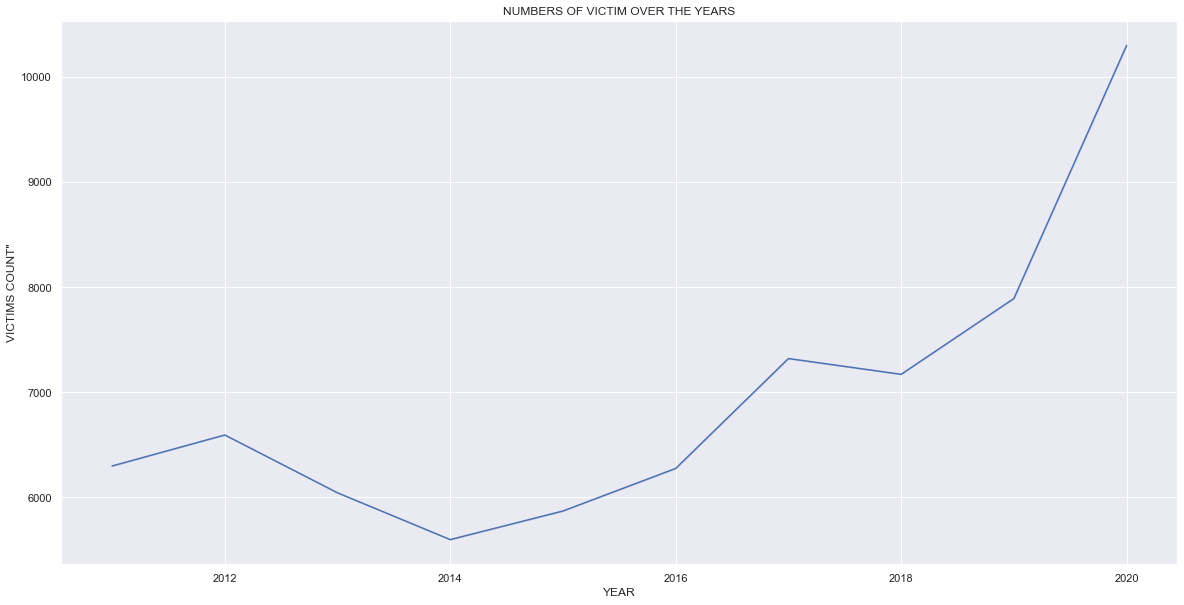

In [4]:
# Plotting a graph of hatecrime over the years
hatecrime_victim_count_plot = vis.visualize_hatecrime(hatecrime_df, 'victim count')

## Analysis on Hypothesis 1 (Plot 2)
- The plot 2 generated below depicts the asian victim count over the years have increased.

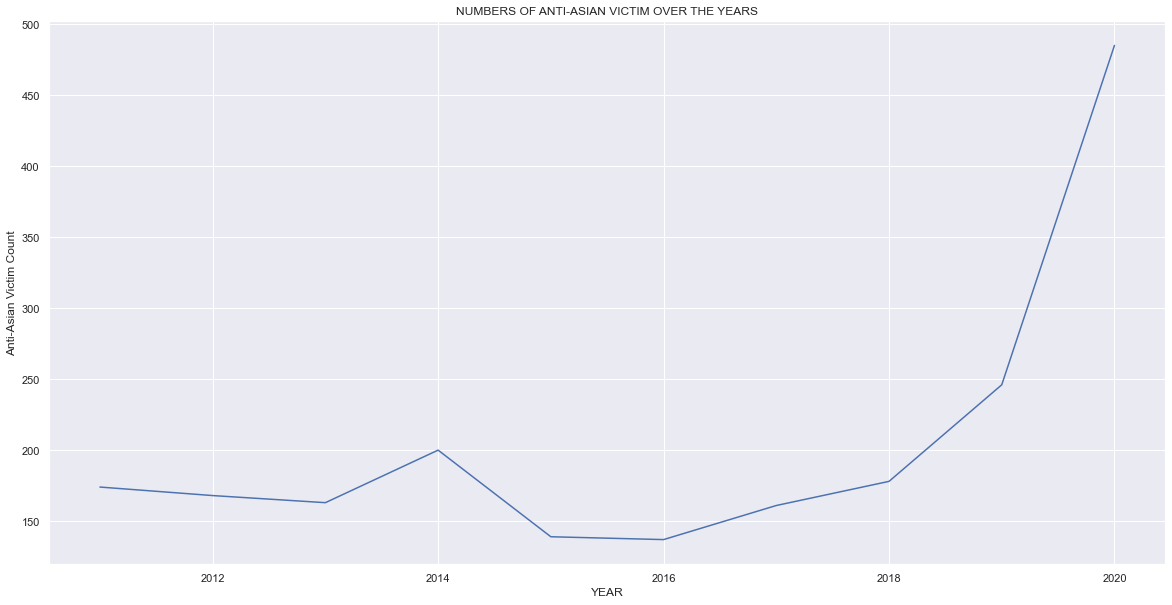

In [5]:
# insert here code for anti-asian
hatecrime_antiasian_victim_count_plot = vis.visualize_hatecrime(hatecrime_df, 'anti-asian')

## CONCLUSION (Hypothesis 1):

- From the plot 2 it is evident that anti-asian hate crime graph has signicicantly increased and is at it's maximum value (479 counts) during the year 2020 which is the same year in which the united states witnessed COVID 19 and hence it can be concluded that anti-asian hate crimes increased during pandemic and HYPOTHESIS 1 is TRUE.

## Hypothesis 2 - Higher unemployment rate in a particular state is directly proportional to higher anti-asian hate crime rates.

## Analysis on Hypothesis 2 : 

- In the initial plot(unemployment_plot) shown below, we have plotted the unemployemnt% of the population in the     united states.
- The plot shows a decreasing trend in the unemployemnt % from the year 2011 till the year 2019.
- For the year 2020, we can analyze that the unemployemnt % have increased due to pandemic and other related factors.
- We also have the hatecrime_unemployment dataframe in which we have merged the 'unemployement' dataset with the 'hatecrime' dataset and analyzed state wise hatecrime counts and the overall unemployemnt % in side by side bar plots namely hatecrime_unemployment_plot

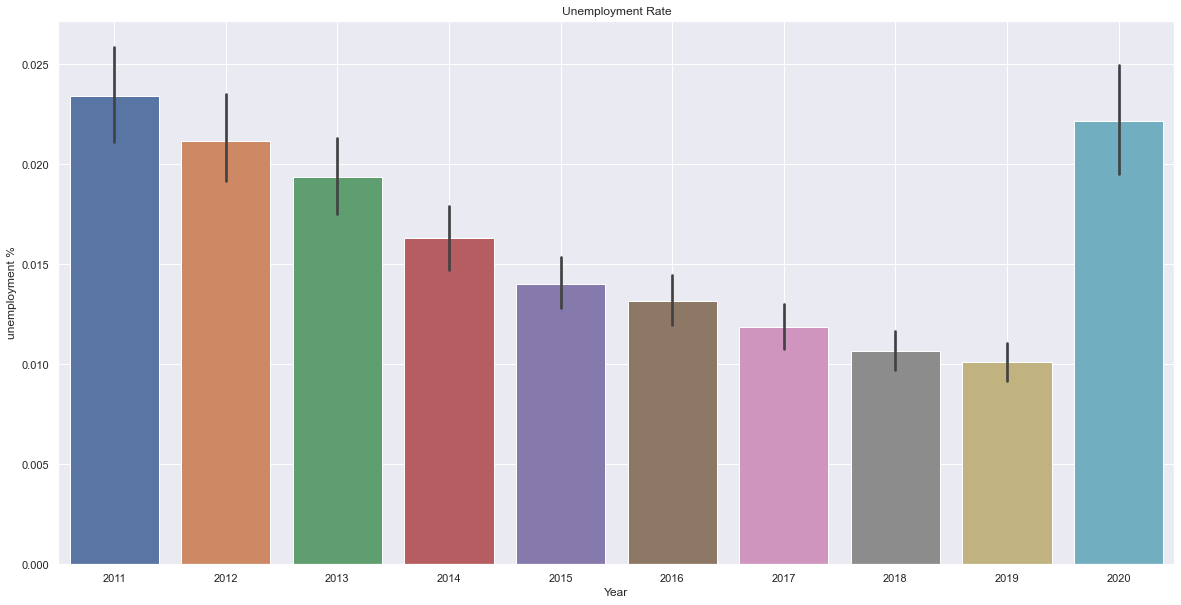

In [7]:
unemployment_plot = vis.visualize_unemployment(unemployment_df)

In [8]:
hatecrime_unemployment = hatecrime_df.merge(unemployment_df,
                                                how='inner',
                                                left_on=['DATA_YEAR', 'STATE_NAME'],
                                                right_on=['Year', 'state'])

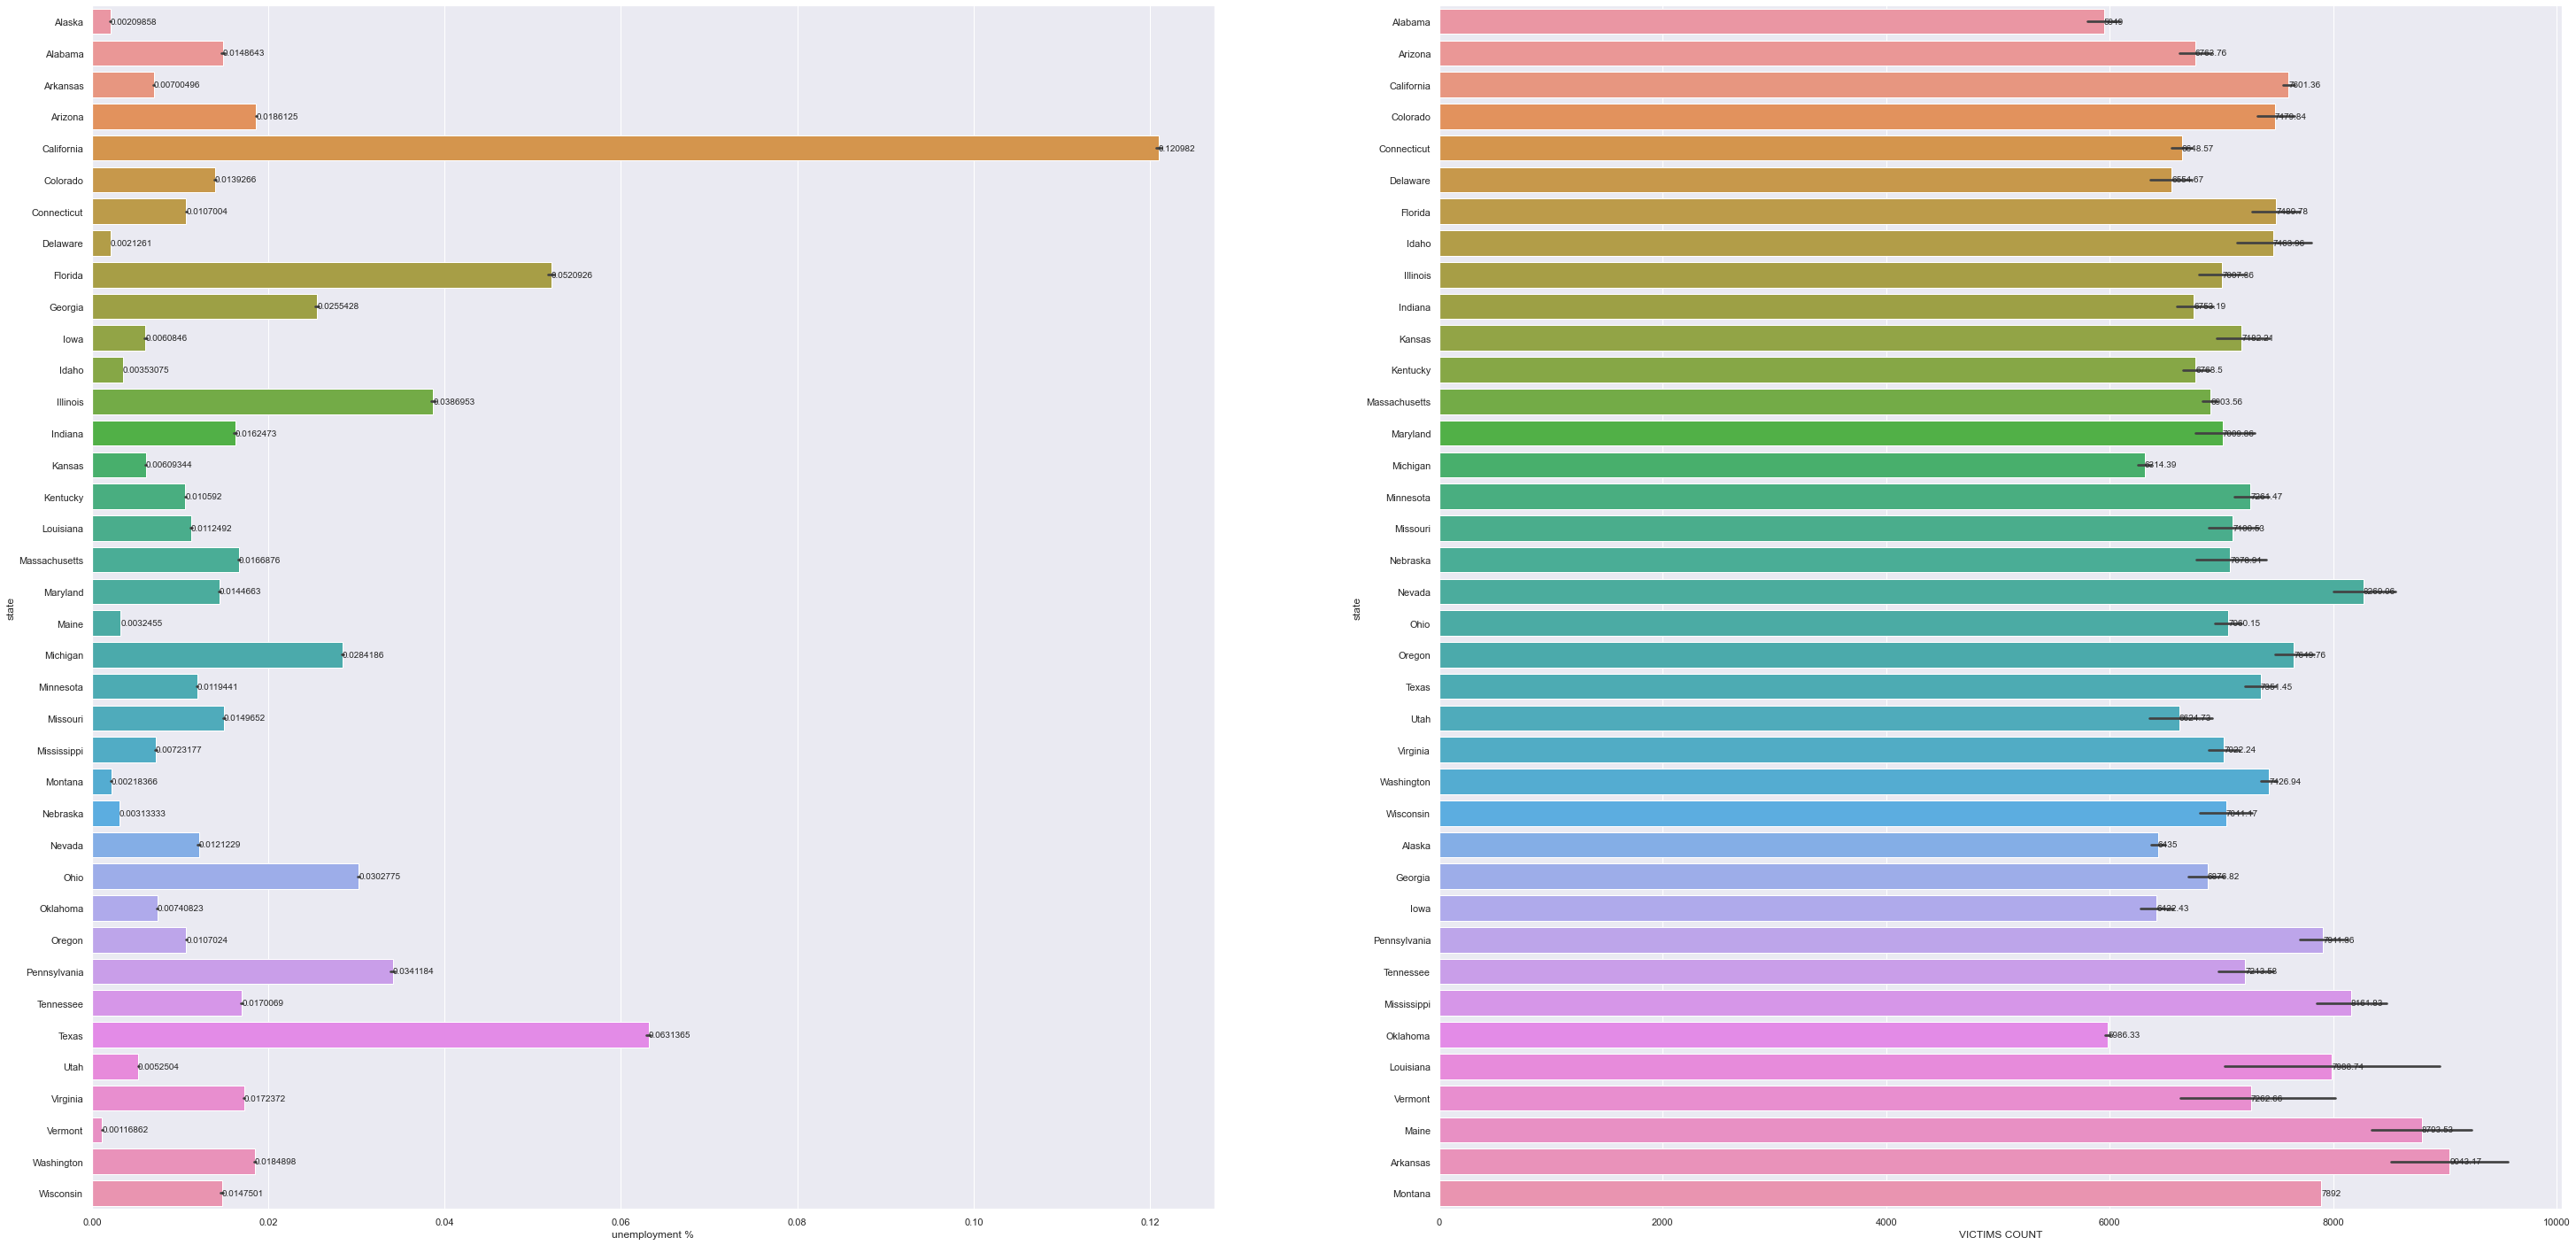

In [9]:
hatecrime_unemployment_plot = vis.visualize_hatecrime_unemployment(hatecrime_unemployment)

# # CONCLUSION 
- From the above hatecrime_unemployment_plot we can see that unemployment does not necessarily attribute to increased anti asian hate crime rates. For example, Vermont has an umemployemnt rate of 0.00116% approximately and the victim count is 7202. On the other hand Michigan has an umemployment rate of 0.0284 % but the victim count is 6214 which is less when compared the victim count in Vermont.

- From the aforementioned hypothesis, we can conclude that Hypothesis 2 is Not True and umemployment rate is not directly proportional to anti-asian hate crimes.

## Hypothesis 3 - Population density of different races(WHITE,BLACK,ASIANS and HISPANIC) in a particular state have no correlation with the occurrence of Anti-Asian Hate crimes.

# # Analysis on Hypothesis 3 :

- We have plotted multiple graphs to analyze this hypothesis. 

- Initially a general offender race count is plotted in 'hatecrime_offender_plot' which shows majority of offenders involved in hate crimes come from an 'unknown' race. So it's hard to corelate and will be a subject to future analysis based on new conclusive data to give a more clearer picture overall

- We have combined statewise population data and populated the percentage of Asians, Whites, Blacks and Hispanics in each states in the US using 'population_plot'.

- We have then combined the 'Race-wise' population and juxtaposed it with Anti-Asian victim count(from the hatecrime dataframe) to decipher if any particular state with a surplus population of a specific race has any relation with the the anti-asian victim count or not.

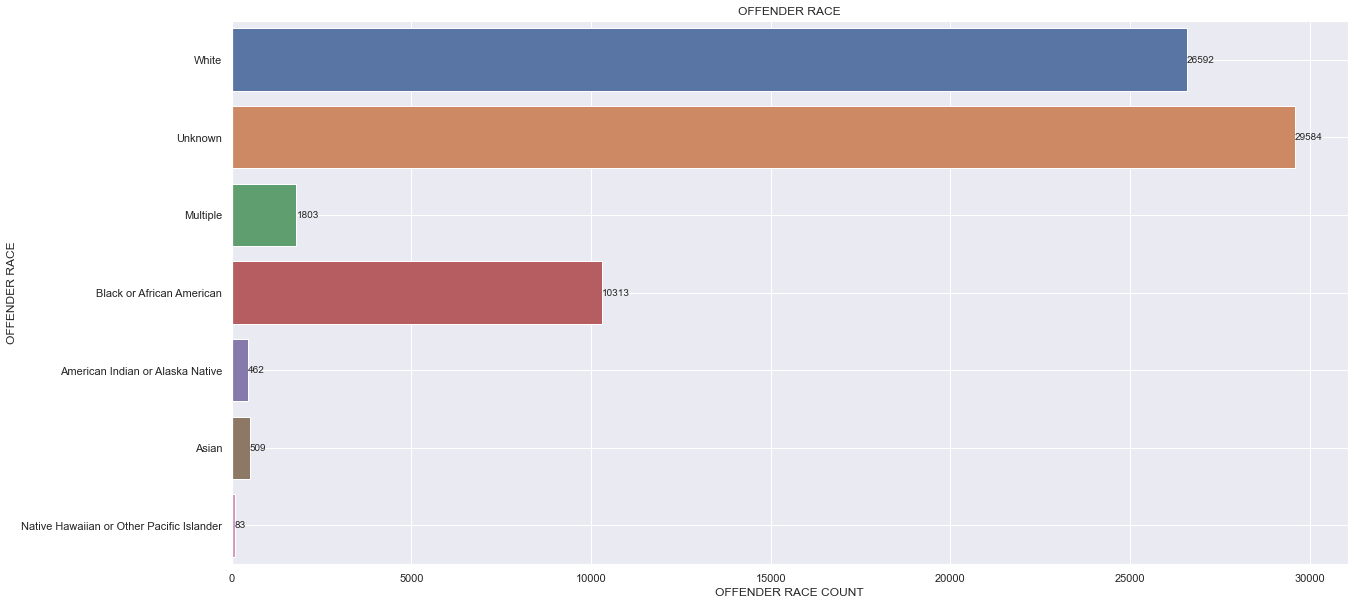

In [6]:
hatecrime_offender_plot = vis.visualize_hatecrime(hatecrime_df, 'offender race')

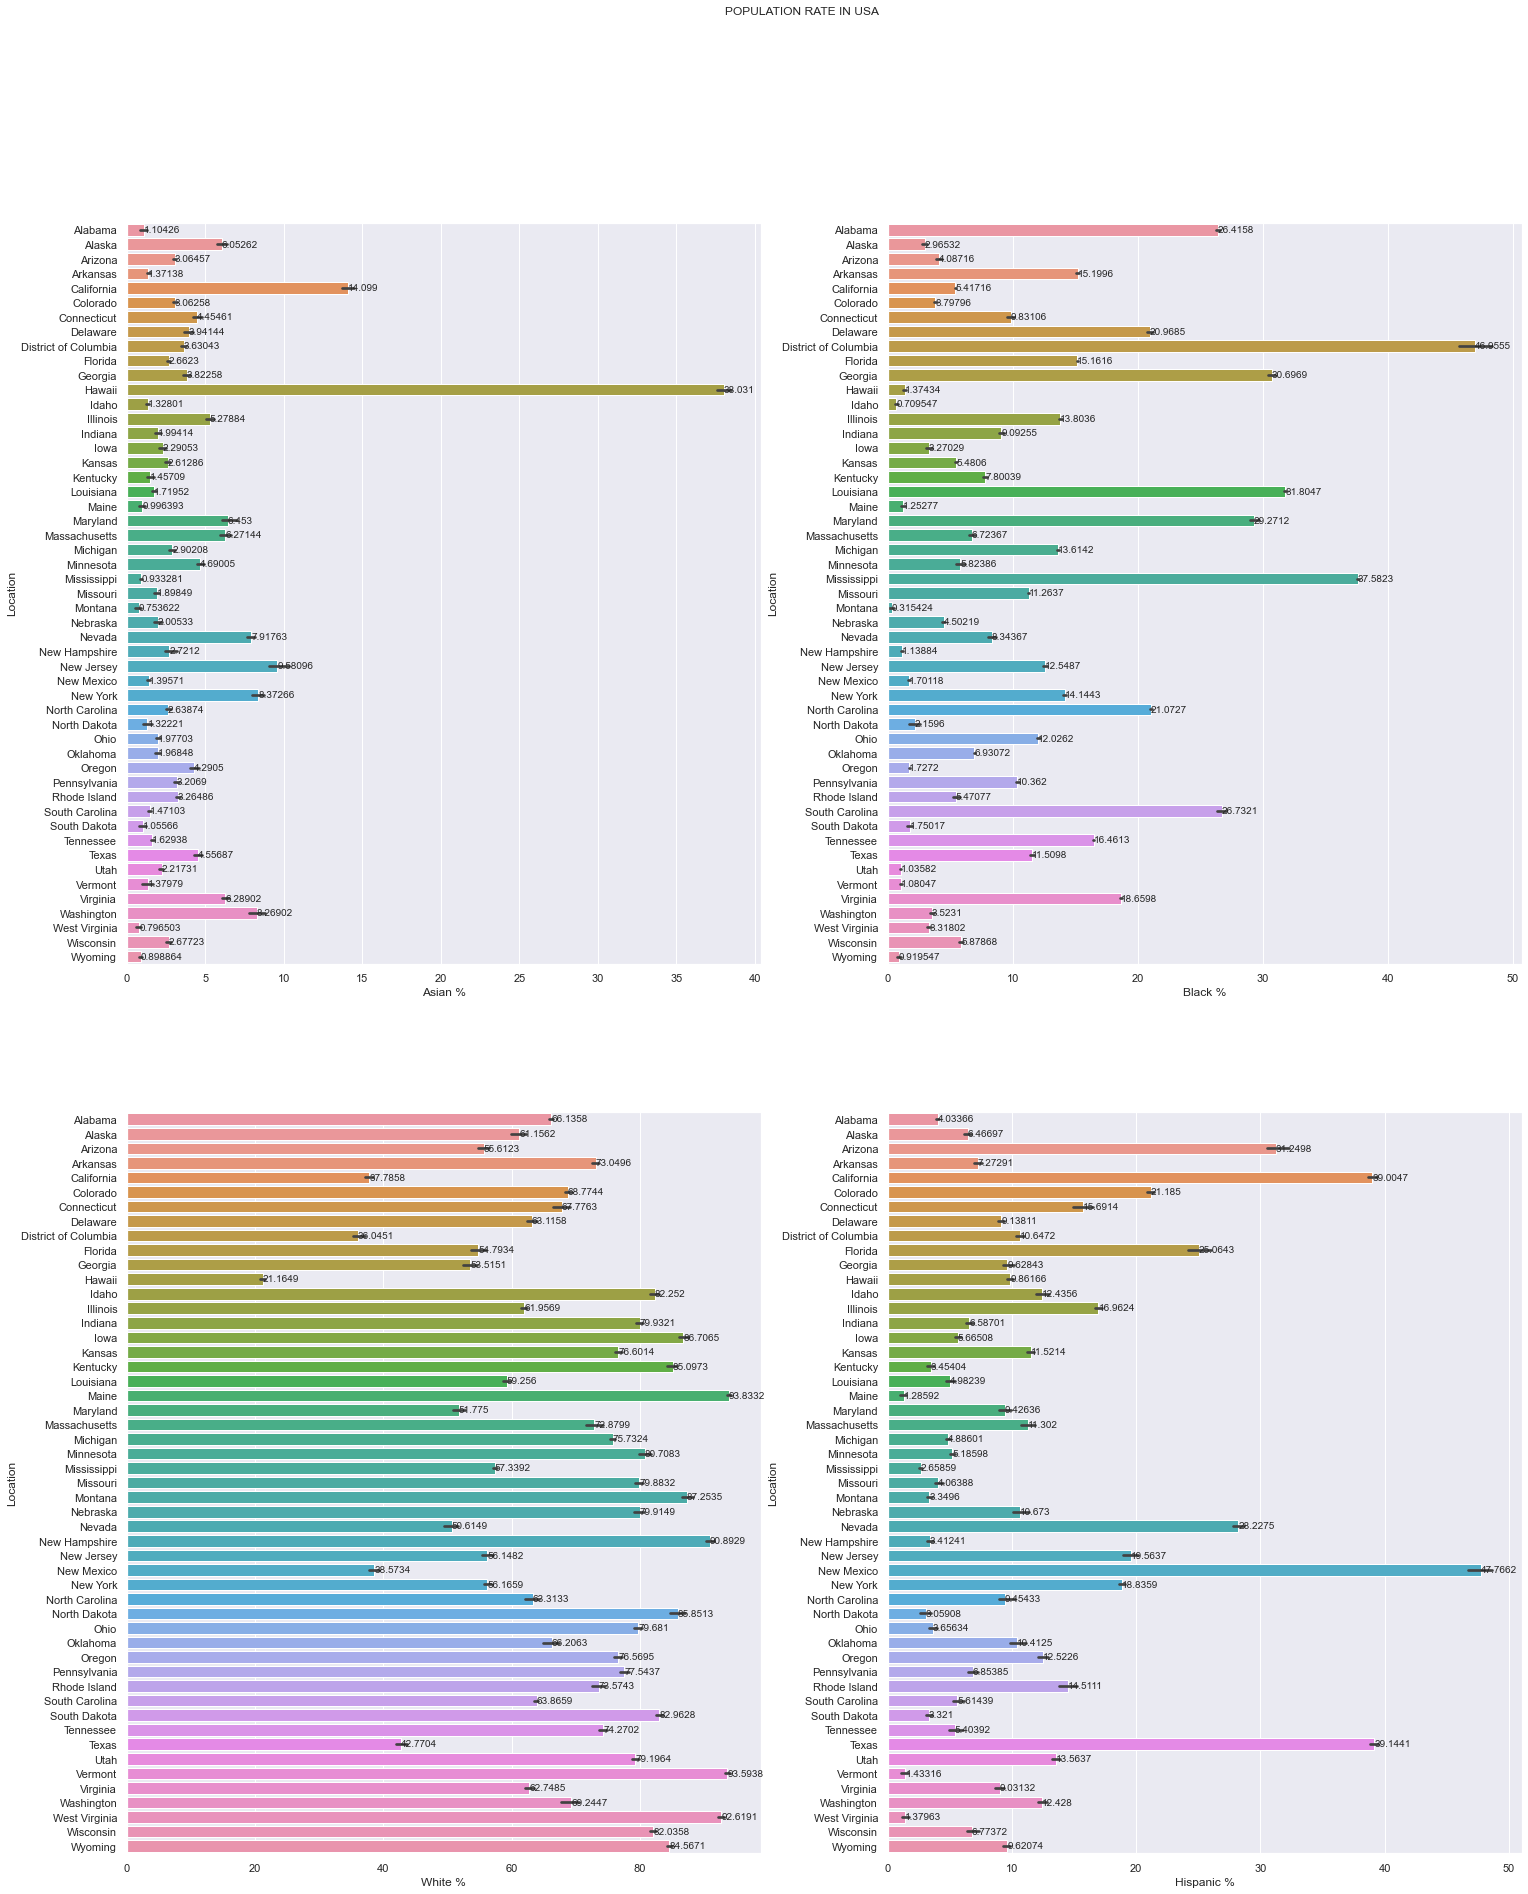

In [10]:
population_plot = vis.visualize_population(population_df)

In [11]:
hatecrime_population = hatecrime_df.merge(population_df,
                                              how='inner',
                                              left_on=['DATA_YEAR', 'STATE_NAME'],
                                              right_on=['Year', 'Location'])

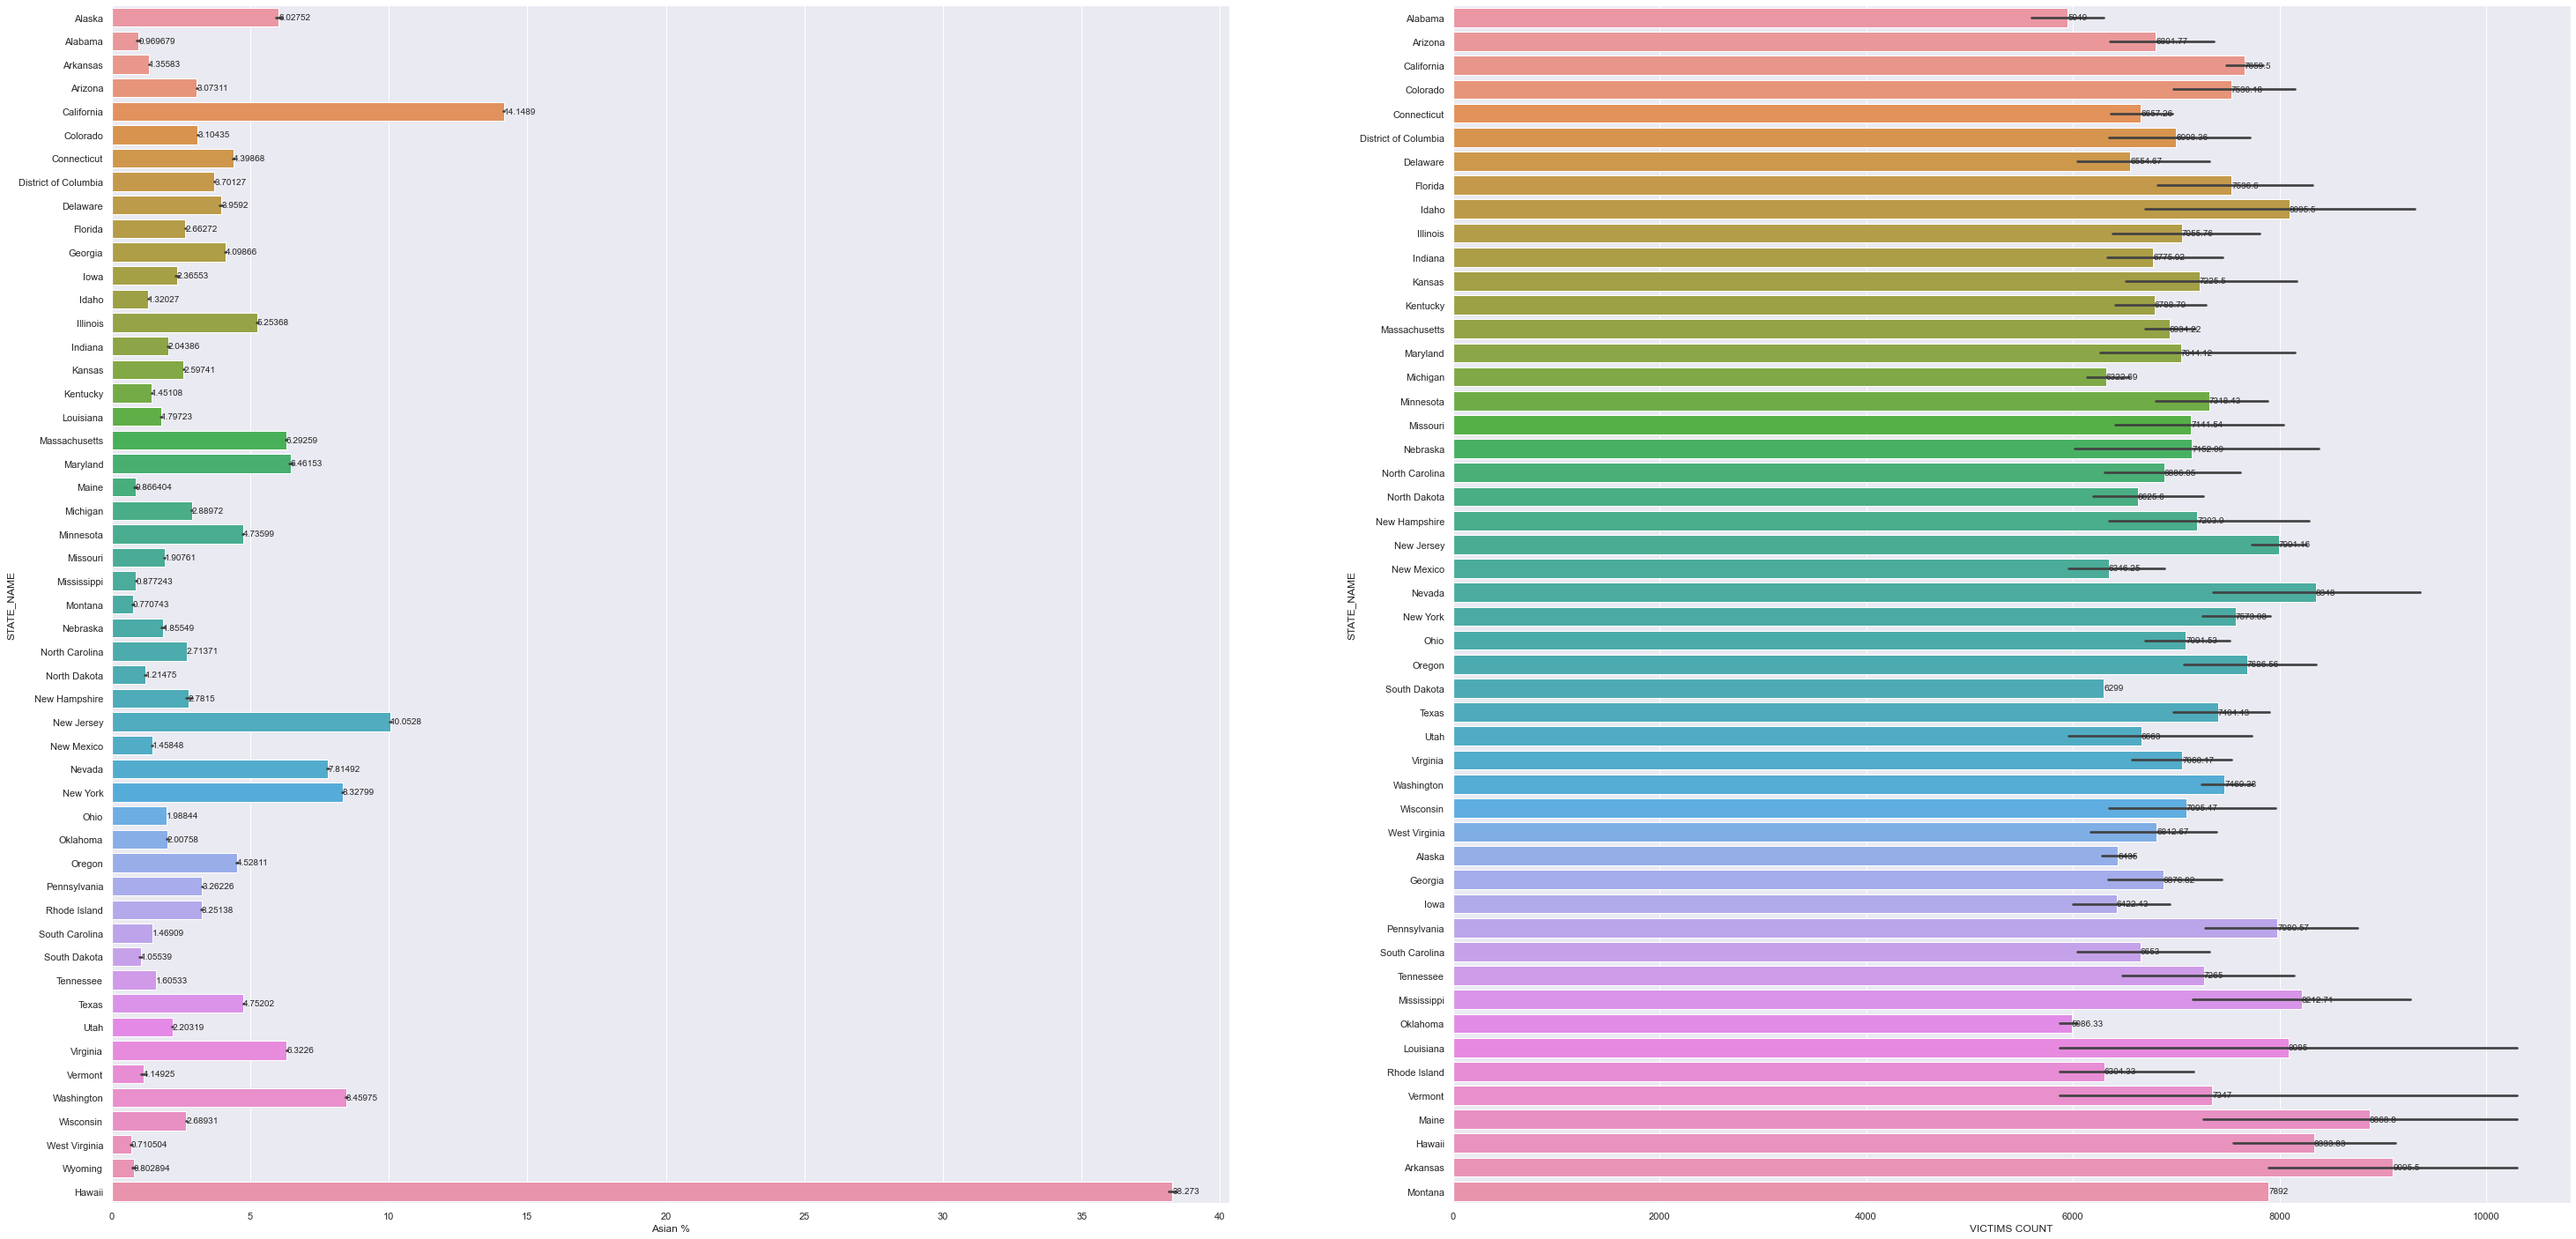

In [12]:
hatecrime_population_asian_plot = vis.visualize_hatecrime_population(hatecrime_population, 'asian')

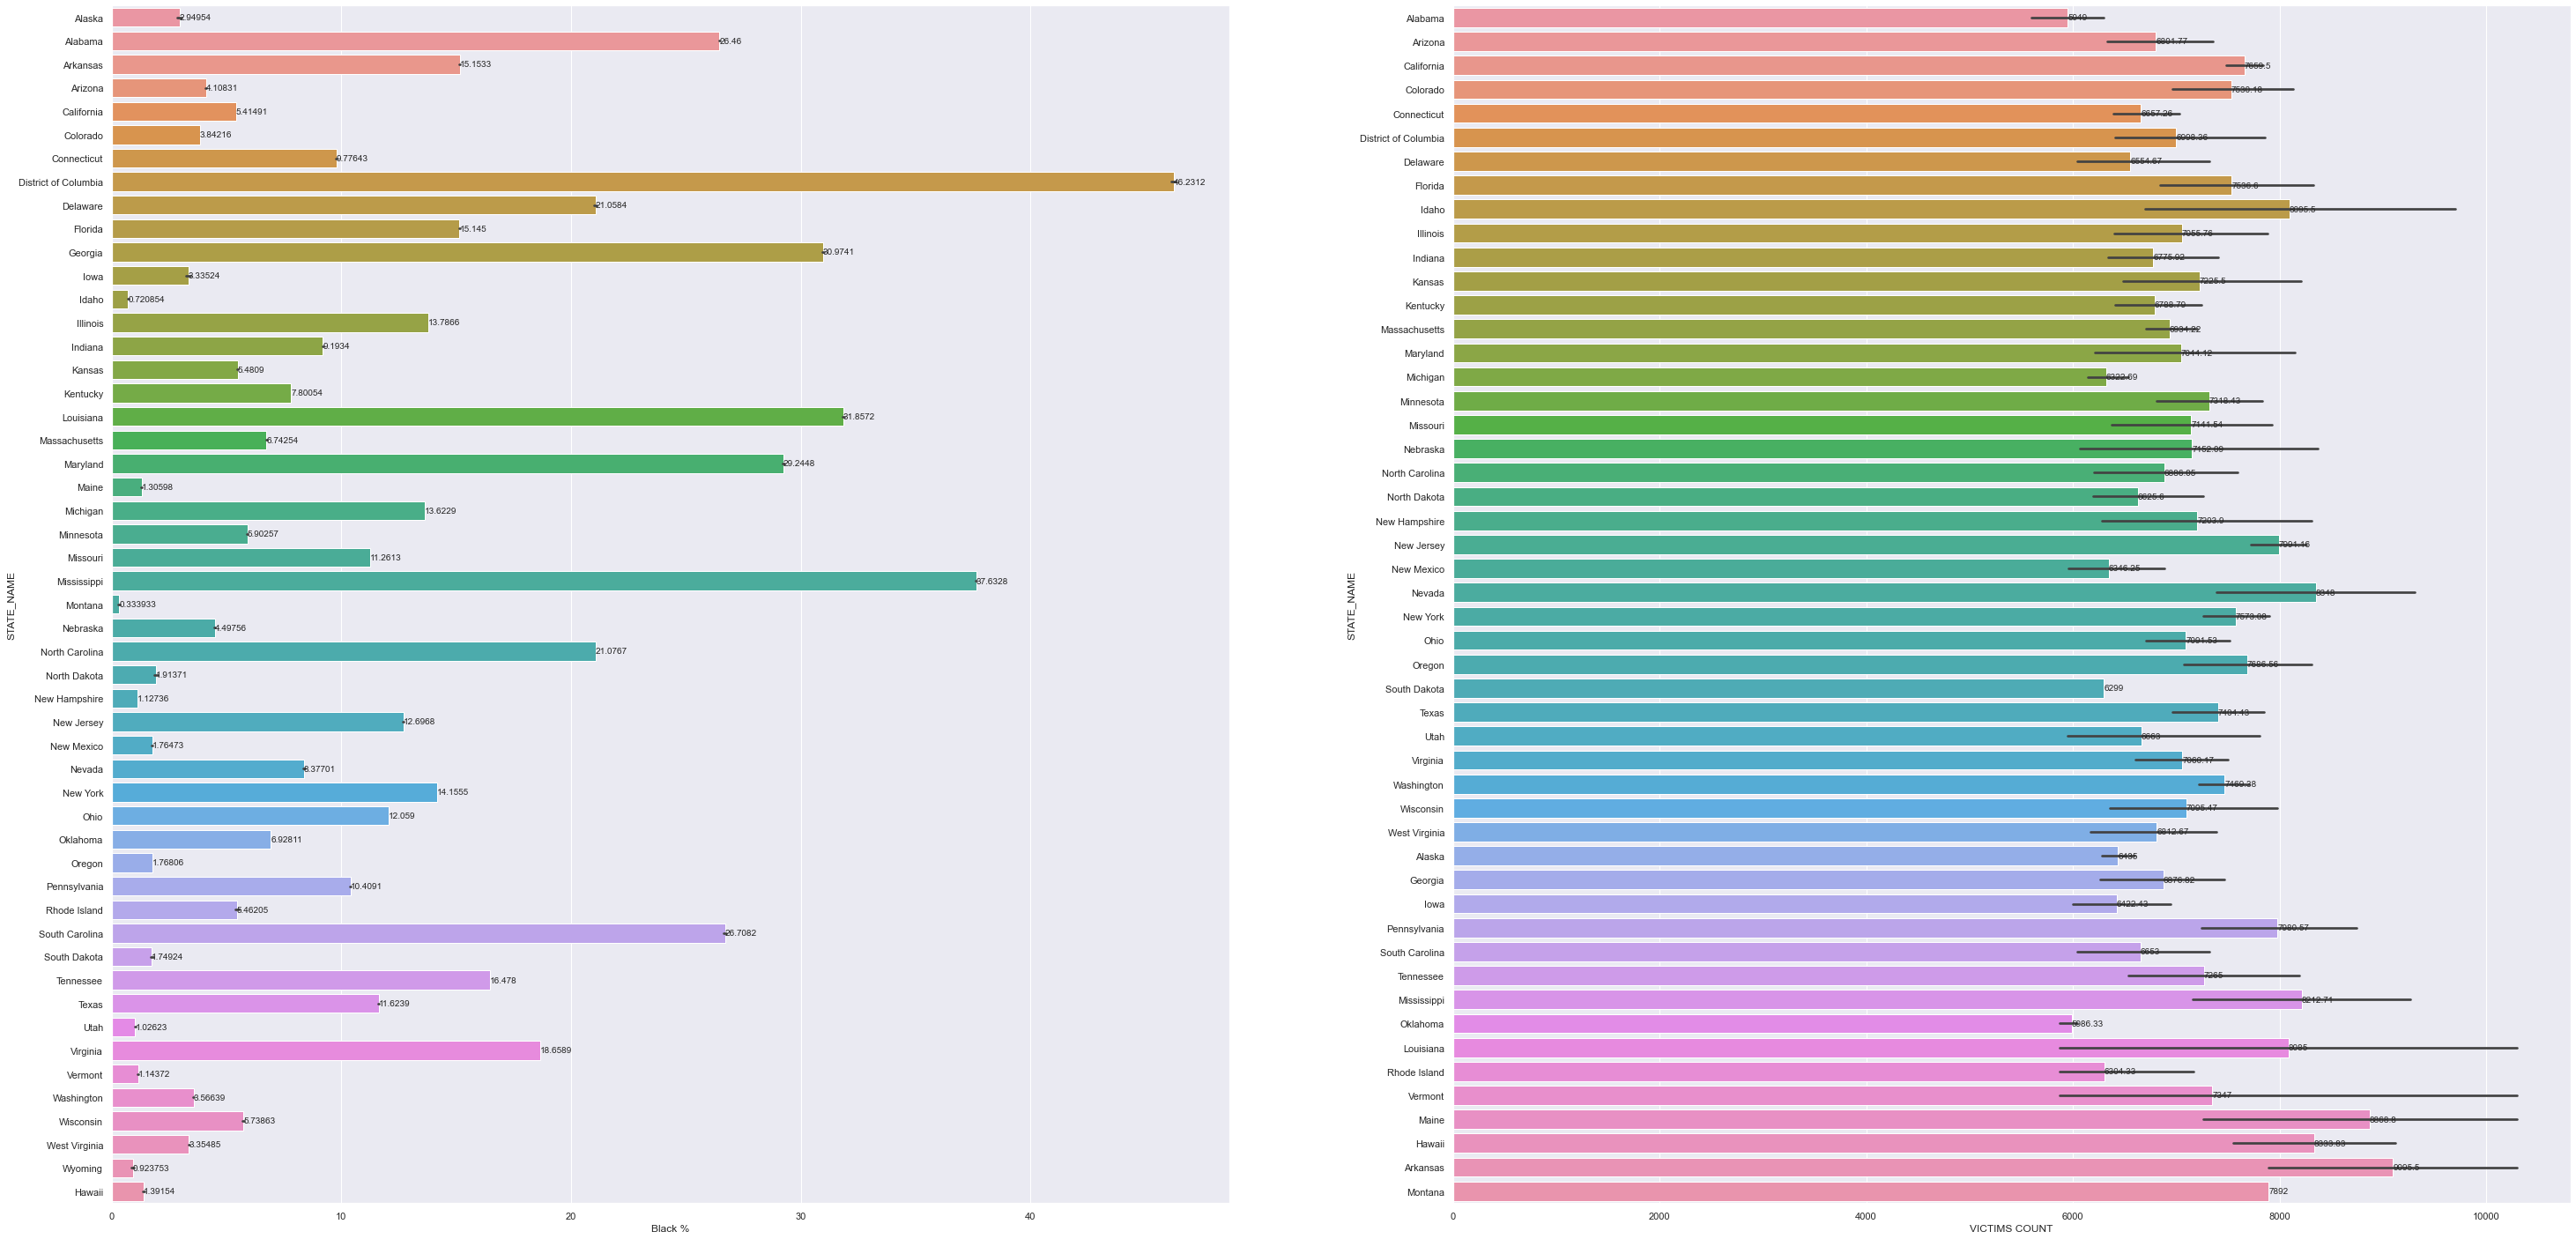

In [13]:
hatecrime_population_black_plot = vis.visualize_hatecrime_population(hatecrime_population, 'black')

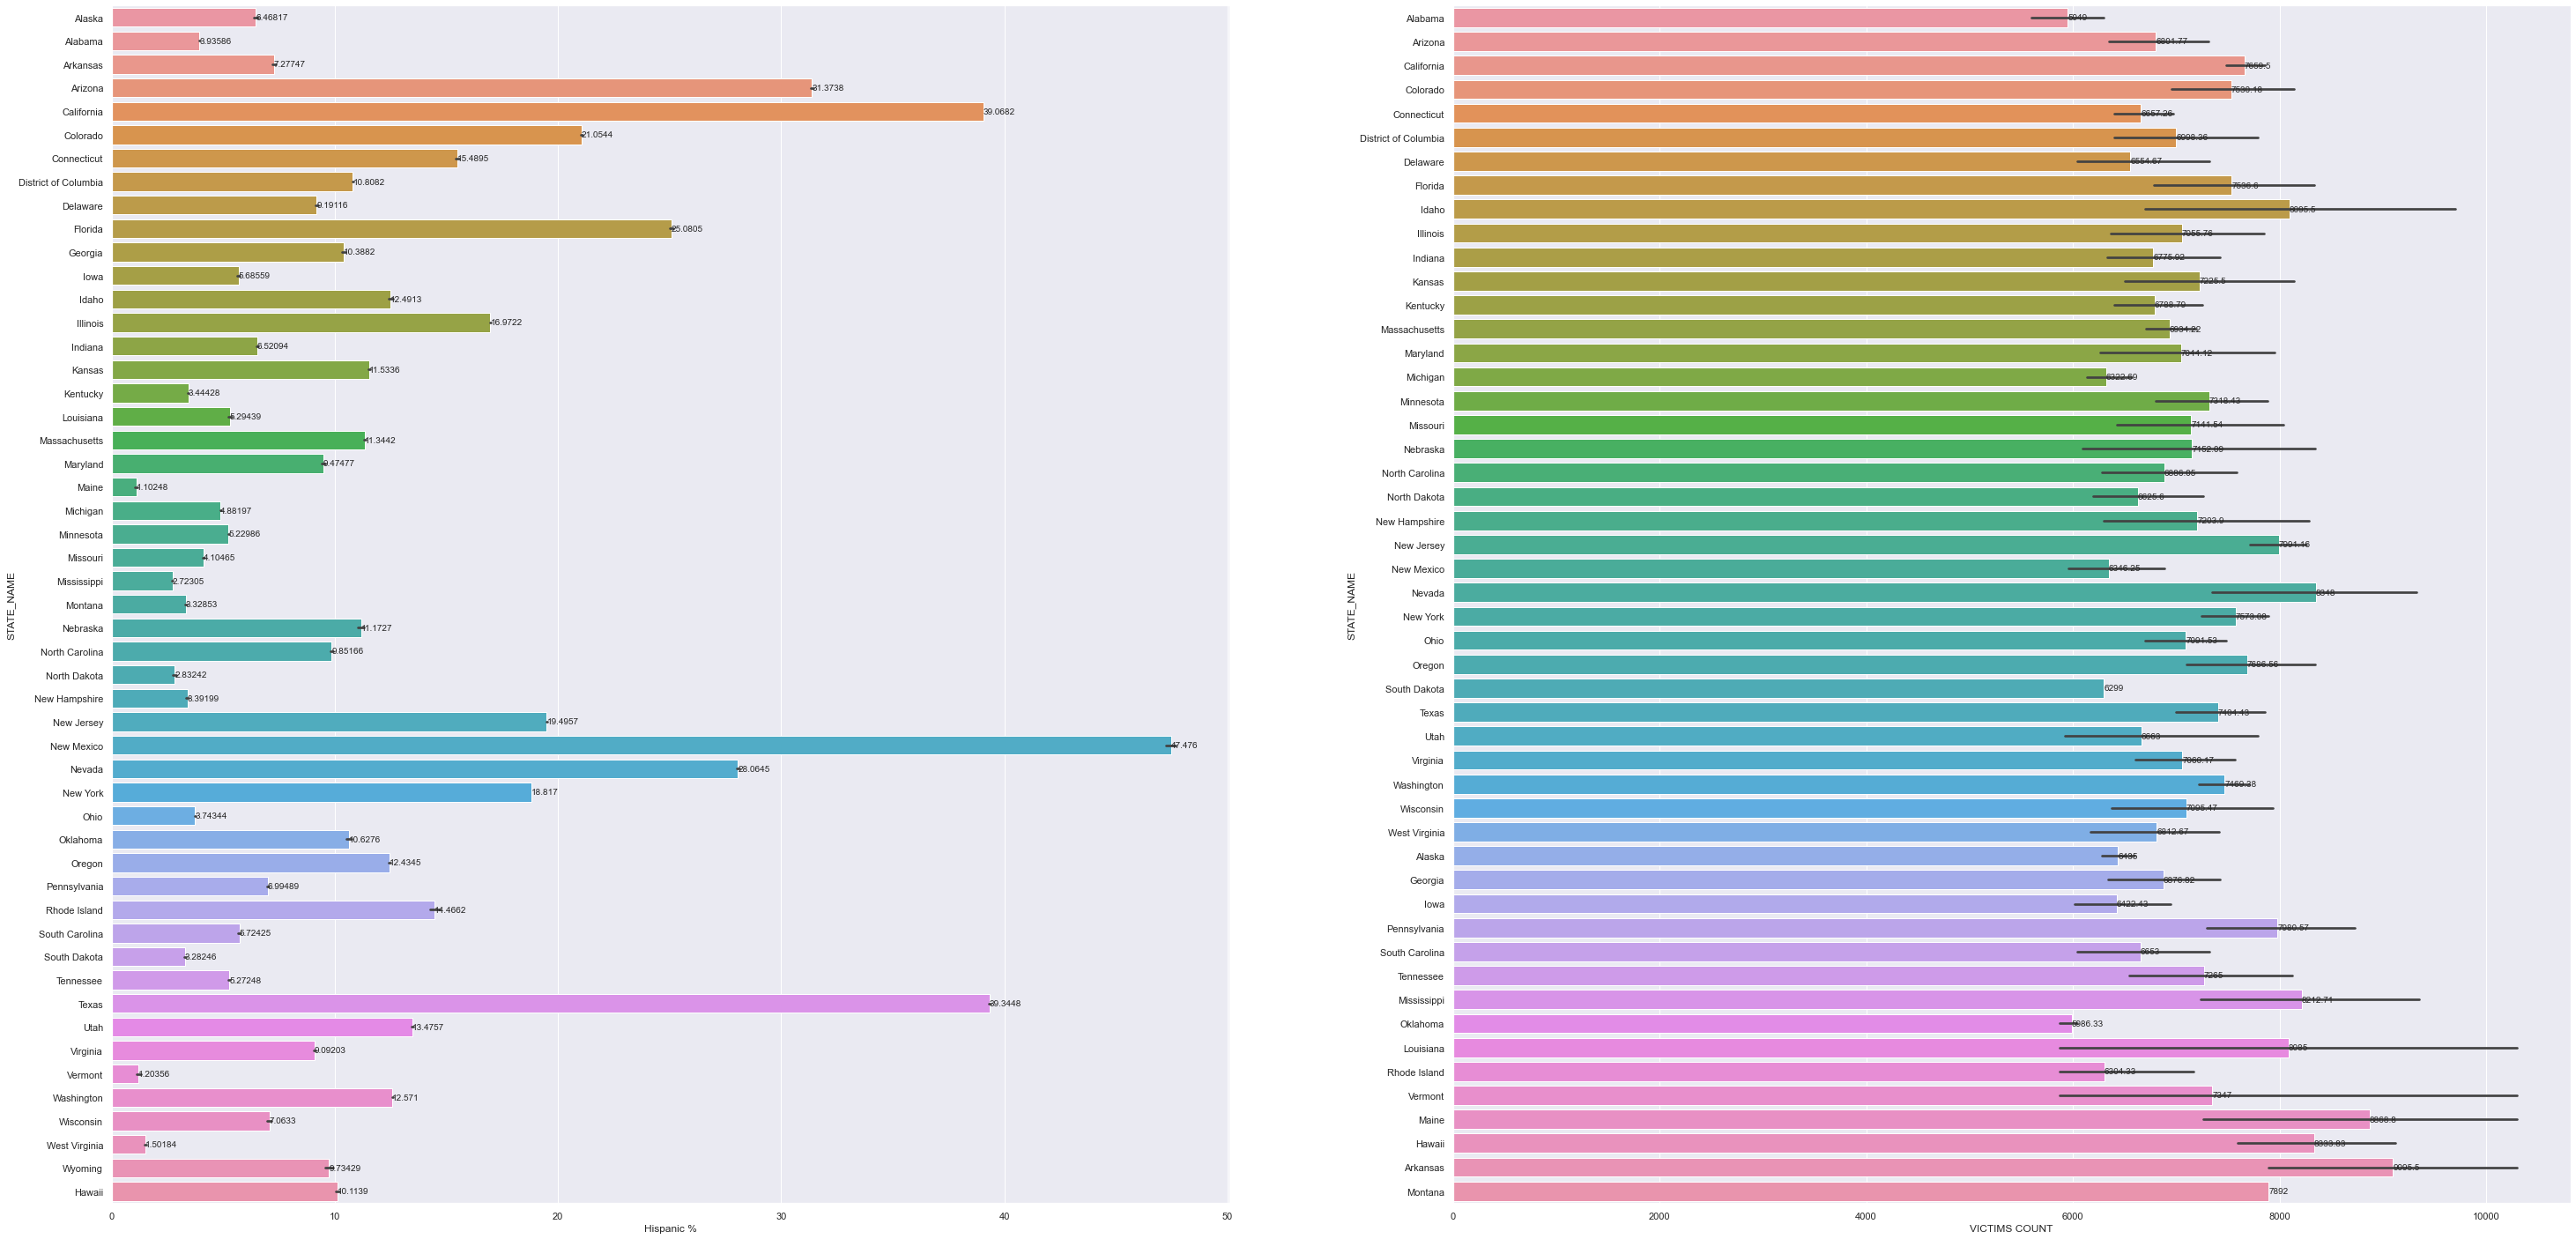

In [14]:
hatecrime_population_hispanic_plot = vis.visualize_hatecrime_population(hatecrime_population, 'hispanic')

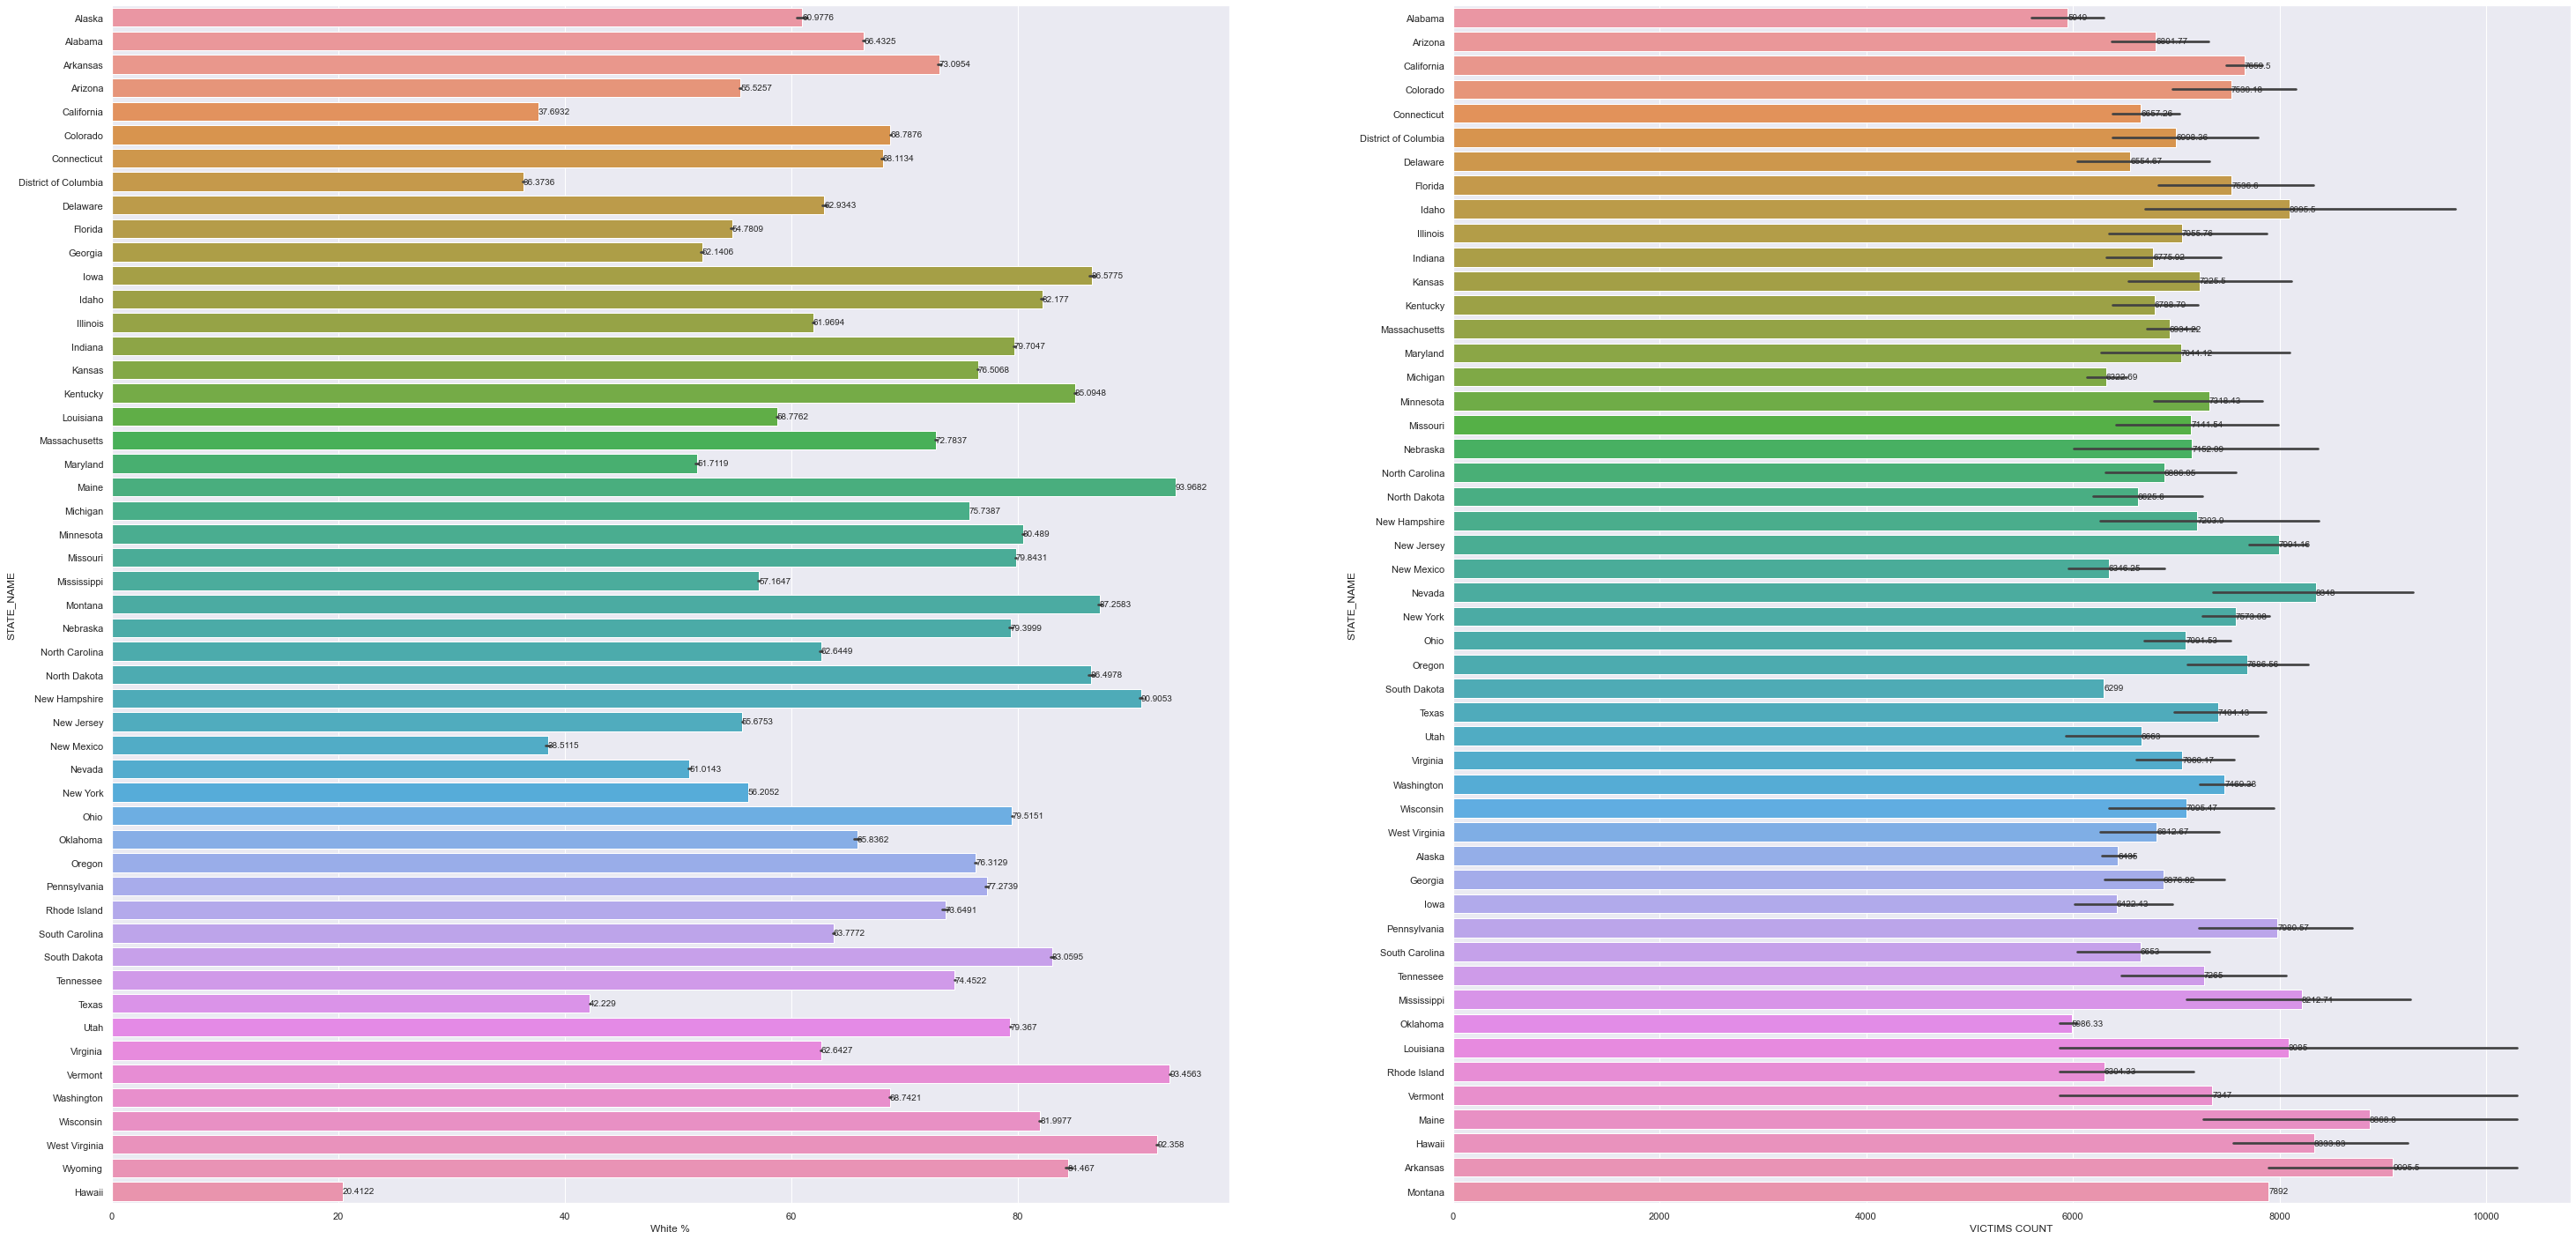

In [15]:
hatecrime_population_white_plot = vis.visualize_hatecrime_population(hatecrime_population, 'white')

# #Conclusion on Hypothesis 3 :

- From the above generated graphs, we can see that there is no direct relation in anti-asian hate crime rate with population density of a particular race(Asians, Whites, Blacks and Hispanics)

- We can therefore conclude that the hypothesis 3 is True and there is no direct relation in anti-asian hate crime rate with population density of a particular race